In [178]:
# import sklearn.datasets
import pandas as pd
import itertools

# Sort function
take = lambda n, iterable: list(itertools.islice(iterable, n)) 
ascending = lambda array: dict(reversed(sorted(array.items(), key=lambda item: item[1])))

class Analyzer:
    def __init__(self, sourcePath):
        self.data = pd.read_csv(sourcePath)
        self.indexes = data['index']
        self.labels = data['label']
        self.texts = data['text']
        # self.processData()
        # self.sortData()
        # self.checkCounting()
        
    def processData(self):
        # Label 0
        self.words = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams
            self.words[i] = {}
            
            for j in range(3):
                self.words[i][j] = {}

        self.label0gram1Words, self.label0gram2Words, self.label0gram3Words = {}, {}, {}
        # Label 1
        self.label1gram1Words, self.label1gram2Words, self.label1gram3Words = {}, {}, {}
        # Whole
        self.gram1Words, self.gram2Words, self.gram3Words = {}, {}, {}

        # for i, text in self.data
        
        # print(self.texts)
        for i,text in enumerate(self.texts):
            # if i > 5:
            #     break
            # print(i,text)
            prev, prevPrev, current = "", "", ""
            for j, word in enumerate(text.split(" ")):
                prevPrev = prev
                prev = current
                current = word
                
                # print(word)

                # Always save to the together 
                # 1-Gram
                # print()
                # print('act1',current)
                if current not in self.words[self.labels[i]][0]:
                    self.words[self.labels[i] ][0][current] = 1
                    self.words[2][0][current] = 1
                else:
                    self.words[self.labels[i] ][0][current] = self.words[self.labels[i] ][0].get(current) + 1
                    self.words[2][0][current] = self.words[2][0].get(current) + 1

                # 2-Gram
                if j > 0:
                    act2 = prev + ' ' + current
                    # print('act2', act2)
                    if act2 not in self.words[self.labels[i]][1]:
                        self.words[self.labels[i] ][1][act2] = 1
                        self.words[2][1][act2] = 1
                    else:
                        self.words[self.labels[i] ][1][act2] = self.words[self.labels[i] ][1].get(act2) + 1
                        self.words[2][1][act2] = self.words[2][1].get(act2) + 1

                # 2-Gram
                if j > 1:
                    act3 = prevPrev + ' ' + prev + ' ' + current
                    # print('act3', act3)
                    if act3 not in self.words[self.labels[i]][2]:
                        self.words[self.labels[i] ][2][act3] = 1
                        self.words[2][2][act3] = 1
                    else:
                        self.words[self.labels[i] ][2][act3] = self.words[self.labels[i] ][2].get(act3) + 1
                        self.words[2][2][act3] = self.words[2][2].get(act3) + 1
        print("process finished")
        # print(self.words[0][1])

    def sortData(self):
        self.sortedAscending = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams

            self.sortedAscending[i] = {}
            for j in range(3):
                # Sort all the words
                self.sortedAscending[i][j] = ascending( self.words[i][j] )
        print("data sorted")

    # Check the correctness by the first element's number
    # in each subset (labeled with 1 and 0) and the whole.
    def checkCounting(self):
        pass

In [180]:
train = Analyzer("stsa.binary.phrases.train")
train.processData()
train.sortData()
train.checkCounting()

process finished
data sorted


In [198]:
# The first 5 most frequent elements
for i in range(2):
  for j in range(3):
    print('L-' + str(i) + ' G-' + str(j+1) + ' (in ascending order): ', take(5, train.sortedAscending[i][j].items()))
  print()

# Together the labels
for i in range(3):
  print('Counting the whole G-' + str(i+1), take(5, train.sortedAscending[2][i].items()))


print()
print('The addition of label 1 and 0 of the "the" word:', 
        take(5, ascendingG1L0.items())[0], '+', 
        take(5, ascendingG1L1.items())[0], '=', take(5, ascendingG1L1.items())[0][1] + take(5, ascendingG1L0.items())[0][1])
print()

# The first 5 most frequent elements of the 3 grams
print('ascendingG1', take(5, ascendingG1.items()))
print('ascendingG2', take(5, ascendingG2.items()))
print('ascendingG3', take(5, ascendingG3.items()))

L-0 G-1 (in ascending order):  [('the', 14357), (',', 12716), ('a', 10715), ('of', 8955), ('and', 8783)]
L-0 G-2 (in ascending order):  [('of the', 1564), (', and', 1070), ('in the', 946), ("it 's", 931), (', but', 818)]
L-0 G-3 (in ascending order):  [("the film 's", 199), ('the movie is', 125), ("it 's a", 124), (", it 's", 114), ('one of the', 113)]

L-1 G-1 (in ascending order):  [('the', 16665), (',', 16380), ('a', 13727), ('and', 13154), ('of', 11423)]
L-1 G-2 (in ascending order):  [('of the', 2232), (', and', 1565), ('in the', 1052), ("it 's", 981), ('is a', 967)]
L-1 G-3 (in ascending order):  [('one of the', 361), ("it 's a", 180), (', but it', 168), ("the film 's", 154), (', and the', 139)]

Counting the whole G-1 [('the', 31020), (',', 29094), ('a', 24440), ('and', 21934), ('of', 20377)]
Counting the whole G-2 [('of the', 3794), (', and', 2634), ('in the', 1997), ("it 's", 1911), (', but', 1742)]
Counting the whole G-3 [('one of the', 471), ("the film 's", 350), ("it 's a",

TypeError: 'dict_items' object is not subscriptable

In [184]:
import matplotlib.pyplot as plt

# Is there a collaration between the avarage length and label?
lengths0, lengths1 = {}, {}
sum0, sum1 = 0, 0
count0, count1 = 0, 0
for i, text in texts.items():
    if labels[i] == 0:
        # Simple avarage length
        sum0 += len(text)
        count0 += 1

        # Number of texts by length
        if len(text) in lengths0:
            lengths0[len(text)] += 1
        else:
            lengths0[len(text)] = 1
    if labels[i] == 1:
        # Simple avarage length
        sum1 += len(text)
        count1 += 1

        if len(text) in lengths1:
            lengths1[len(text)] += 1
        else:
            lengths1[len(text)] = 1

In [186]:
print('sum1',sum1, count1, 'so the avarage:', (sum1/count1) )
print('sum0',sum0, count0, 'so the avarage:', (sum0/count0) )

print('lengths1 keys', lengths1.keys())
print()
print('lengths1 values', lengths1.values())
print()
print('lengths1', lengths1)

sum1 2143447 42259 so the avarage: 50.72166875695118
sum0 1872665 34702 so the avarage: 53.96418073886231
lengths1 keys dict_keys([31, 158, 156, 13, 10, 191, 24, 59, 35, 32, 3, 135, 16, 55, 22, 39, 34, 18, 19, 20, 40, 38, 12, 9, 73, 5, 30, 49, 80, 51, 65, 11, 61, 14, 29, 6, 147, 77, 47, 52, 21, 112, 15, 28, 84, 70, 148, 82, 66, 43, 23, 74, 67, 26, 110, 96, 7, 121, 33, 56, 111, 36, 104, 91, 8, 150, 173, 101, 79, 78, 45, 133, 17, 72, 44, 131, 114, 53, 60, 57, 99, 138, 75, 48, 106, 171, 161, 50, 169, 154, 27, 68, 119, 175, 85, 41, 93, 89, 115, 37, 63, 153, 62, 42, 25, 122, 139, 54, 136, 81, 98, 165, 102, 92, 124, 94, 126, 58, 95, 105, 146, 46, 76, 97, 137, 184, 129, 120, 64, 71, 149, 117, 168, 87, 108, 88, 193, 162, 103, 130, 198, 157, 86, 145, 69, 144, 107, 90, 176, 164, 167, 140, 128, 125, 116, 160, 182, 123, 181, 204, 109, 200, 180, 228, 239, 142, 141, 155, 170, 225, 100, 230, 199, 260, 187, 134, 4, 251, 166, 183, 118, 143, 127, 231, 83, 132, 172, 233, 219, 174, 190, 163, 188, 240, 205

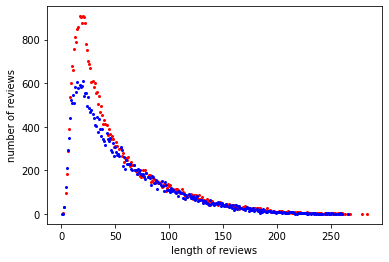

In [187]:
plt.plot( lengths1.keys(), lengths1.values(), 'ro', markersize=2)
plt.plot( lengths0.keys(), lengths0.values(), 'bo', markersize=2)
plt.xlabel('length of reviews')
plt.ylabel('number of reviews')
plt.show()
# Conclusion: If it's not a long 